<a href="https://colab.research.google.com/github/arnav307/Concept-and-technology-of-AI/blob/main/worksheet7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score


In [5]:
# PART 1: REGRESSION (California Housing)
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic data with similar characteristics
X, y = make_regression(n_samples=20640, n_features=8, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
# Baseline Linear Regression (No Regularization)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mse, test_mse


(99.78476792958459, 100.88809768997487)

In [10]:
# Step 2: Hyperparameter Tuning (Ridge & Lasso)
alpha_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
# Ridge Regression (L2)
ridge = Ridge()
ridge_cv = GridSearchCV(
    ridge, alpha_grid, cv=5, scoring='neg_mean_squared_error'
)
ridge_cv.fit(X_train, y_train)

best_ridge = ridge_cv.best_estimator_


In [11]:
ridge_train_mse = mean_squared_error(y_train, best_ridge.predict(X_train))
ridge_test_mse = mean_squared_error(y_test, best_ridge.predict(X_test))

ridge_cv.best_params_, ridge_test_mse


({'alpha': 0.1}, 100.88851078915167)

In [12]:
# Lasso Regression (L1)
lasso = Lasso(max_iter=10000)
lasso_cv = GridSearchCV(
    lasso, alpha_grid, cv=5, scoring='neg_mean_squared_error'
)
lasso_cv.fit(X_train, y_train)

best_lasso = lasso_cv.best_estimator_


In [13]:
lasso_train_mse = mean_squared_error(y_train, best_lasso.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, best_lasso.predict(X_test))

lasso_cv.best_params_, lasso_test_mse


({'alpha': 0.01}, 100.90490382664345)

In [16]:
#  L1 vs L2 Comparison
pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso"],
    "Train MSE": [train_mse, ridge_train_mse, lasso_train_mse],
    "Test MSE": [test_mse, ridge_test_mse, lasso_test_mse]
})


,Model,Train MSE,Test MSE
0,Linear,99.784768,100.888098
1,Ridge,99.784769,100.888511
2,Lasso,99.785560,100.904904


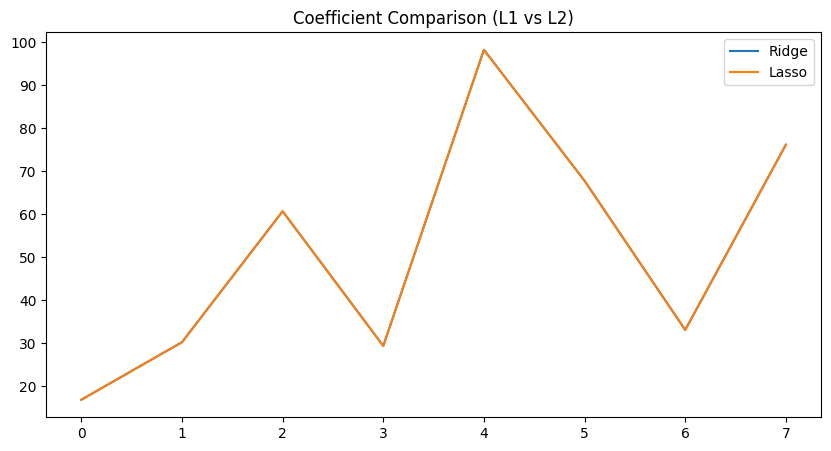

In [26]:
# Coefficient Comparison
plt.figure(figsize=(10,5))
plt.plot(best_ridge.coef_, label='Ridge')
plt.plot(best_lasso.coef_, label='Lasso')
plt.legend()
plt.title("Coefficient Comparison (L1 vs L2)")
plt.show()


In [18]:
# classification
# Task 1: Load & Split Dataset
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
#  Baseline Logistic Regression
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)

train_acc = accuracy_score(y_train, log_reg.predict(X_train))
test_acc = accuracy_score(y_test, log_reg.predict(X_test))

train_acc, test_acc


(0.9582417582417583, 0.956140350877193)

In [27]:
# Hyperparameter Tuning (C & Penalty)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}


In [21]:
log_cv = GridSearchCV(
    LogisticRegression(max_iter=5000),
    param_grid,
    cv=5,
    scoring='accuracy'
)

log_cv.fit(X_train, y_train)
best_log = log_cv.best_estimator_


In [22]:
best_log, accuracy_score(y_test, best_log.predict(X_test))


(LogisticRegression(C=100, max_iter=5000, penalty='l1', solver='liblinear'),
 0.9824561403508771)

In [28]:
# L1 vs L2 Logistic Regression
log_l1 = LogisticRegression(
    penalty='l1', C=log_cv.best_params_['C'],
    solver='liblinear', max_iter=5000
)

log_l2 = LogisticRegression(
    penalty='l2', C=log_cv.best_params_['C'],
    solver='liblinear', max_iter=5000
)

log_l1.fit(X_train, y_train)
log_l2.fit(X_train, y_train)


LogisticRegression(C=100, max_iter=5000, solver='liblinear')

In [24]:
pd.DataFrame({
    "Model": ["Logistic L1", "Logistic L2"],
    "Train Accuracy": [
        accuracy_score(y_train, log_l1.predict(X_train)),
        accuracy_score(y_train, log_l2.predict(X_train))
    ],
    "Test Accuracy": [
        accuracy_score(y_test, log_l1.predict(X_test)),
        accuracy_score(y_test, log_l2.predict(X_test))
    ]
})


,Model,Train Accuracy,Test Accuracy
0,Logistic L1,0.989011,0.982456
1,Logistic L2,0.969231,0.956140


In [25]:
np.sum(log_l1.coef_ == 0), np.sum(log_l2.coef_ == 0)


(np.int64(9), np.int64(0))

In [ ]:
# Bias–Variance Tradeoff

# Regularization reduces overfitting

# L1: Sparse, interpretable, feature selection

# L2: Smooth, stable, better when many features matter

# Strong regularization → high bias